# Poisson Solver

Poisson solver using jacobi iteration to a diffusion problem.

## Create domain

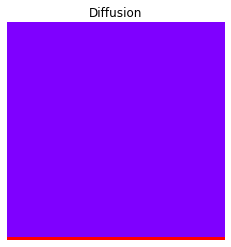

In [1]:
NUM_NODES = 64

import numpy as np
import numba
import matplotlib.pyplot as plt

domain = np.zeros((NUM_NODES, NUM_NODES)) 
domain[NUM_NODES-1:NUM_NODES] = 1000.0

# Draw the domain
plt.axis('off')
img = plt.imshow(domain, cmap=plt.get_cmap('rainbow'))
plt.title('Diffusion')
plt.show()

## Jacobi iteration

    Jacobi method solves Ax=b where
    A contains the coefficient of the discrete laplace operator
    0 -1  0
    -1 4 -1
    0 -1  0
    x is the unknown discretized function (array)
    b is equal to zero
    By definition, The jacobi iteration is :
    xi(k+1) = 1/aii * (bi - sum(aij * xj(k)) 'where j!=i')
    because b is a zero array and aii reference the coefficient 4
    xi(k+1) = 1/4 * (- sum(aij * xj(k)) 'for j!=i')
    and aij are -1 for j!=i
    => xi(k+1) = 1/4 * (sum(xj(k)) 'for j!=i')

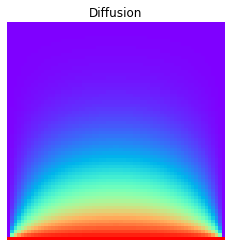

In [2]:
@numba.njit
def jacobi_iteration(x, next_x):
    for i in range(1, NUM_NODES-1):
        for j in range(1, NUM_NODES-1):
            next_x[i][j] = (x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1]) * 0.25

JACOBI_ITERATIONS = 1000
buffer = [domain, np.copy(domain)]
for it in range(JACOBI_ITERATIONS):
    jacobi_iteration(buffer[0], buffer[1])
    buffer[0], buffer[1] = buffer[1], buffer[0] # swap buffers

# Draw the domain
plt.axis('off')
img = plt.imshow(buffer[1], cmap=plt.get_cmap('rainbow'))
plt.title('Diffusion')
plt.show()